In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [2]:
ckpts10 = [int(_) for _ in ["220", "440", "660", "880", "1100"]]


In [59]:
test_accs_rand = []
ckpts = ["220", "440", "660", "880", "1100", "1320", "1540", "1760", "1980", "2200"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs20"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_rand.append(test_accs.mean())


test_accs_rand = np.array(test_accs_rand)

0.03856
0.06436
0.08876
0.10604
0.11772
0.13228
0.14232
0.1492
0.15552
0.16024


In [60]:
test_accs_rand = []
# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_rand.append(test_accs.mean())


test_accs_rand = np.array(test_accs_rand)

0.04272
0.08028
0.11484
0.13392
0.1482


In [4]:
test_accs_dict = {}
for num in [0, 1, 2, 3, 4]:

    test_accs_ckpt = []

    for ckpt in ckpts10:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
        test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
        # print(test_accs.mean())
        test_accs_ckpt.append(test_accs.mean())

    test_accs_ckpt = np.array(test_accs_ckpt)
    test_accs_dict[num] = test_accs_ckpt

In [5]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [6]:
num_memorized_dict = {}
num_correct_different_dict = {}
num_incorrect_dict = {}
for num in range(5):
    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    ckpts = ["220", "440", "660", "880", "1100"]

    for ckpt in ckpts:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
        subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")
        # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
        train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
        train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

        num_memorized_ckpt = []
        num_correct_different_ckpt = []
        num_incorrect_ckpt = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_ckpt.append(num_memorized)
            num_correct_different_ckpt.append(num_correct_different)
            num_incorrect_ckpt.append(num_incorrect)
        
        num_memorized_all.append(num_memorized_ckpt)
        num_correct_different_all.append(num_correct_different_ckpt)
        num_incorrect_all.append(num_incorrect_ckpt)
        
    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)

    num_memorized_dict[num] = num_memorized_all
    num_correct_different_dict[num] = num_correct_different_all
    num_incorrect_dict[num] = num_incorrect_all

In [7]:
num_memorized_rand = []
num_correct_different_rand = []
num_incorrect_rand = []

ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")

    train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_rand.append(num_memorized_ckpt)
    num_correct_different_rand.append(num_correct_different_ckpt)
    num_incorrect_rand.append(num_incorrect_ckpt)
    
num_memorized_rand = np.array(num_memorized_rand)
num_correct_different_rand = np.array(num_correct_different_rand)
num_incorrect_rand = np.array(num_incorrect_rand)

In [21]:
(num_memorized_dict[num]==5) *np.expand_dims((num_correct_different_dict[num].max(axis=0)<2), 0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [22]:
(((num_memorized_dict[num]==5) *np.expand_dims((num_correct_different_dict[num].max(axis=0)<2), 0))).mean(axis=-1)

array([0.        , 0.00340136, 0.02758881, 0.07369615, 0.11791383])

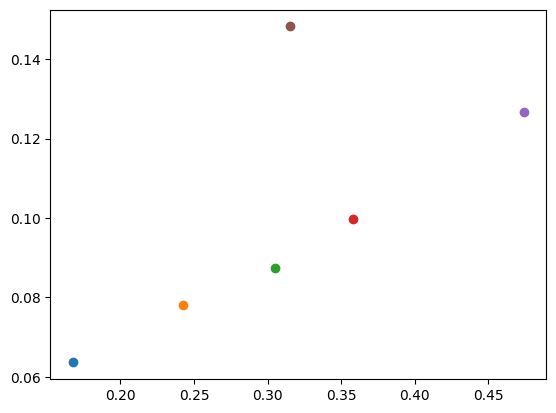

In [31]:
for num in range(5):
    plt.plot((num_correct_different_dict[num].max(axis=0)>=4).mean(axis=-1), test_accs_dict[num][-1], "o-")

plt.plot((num_correct_different_rand.max(axis=0)>=4).mean(axis=-1), test_accs_rand[-1], "o-")


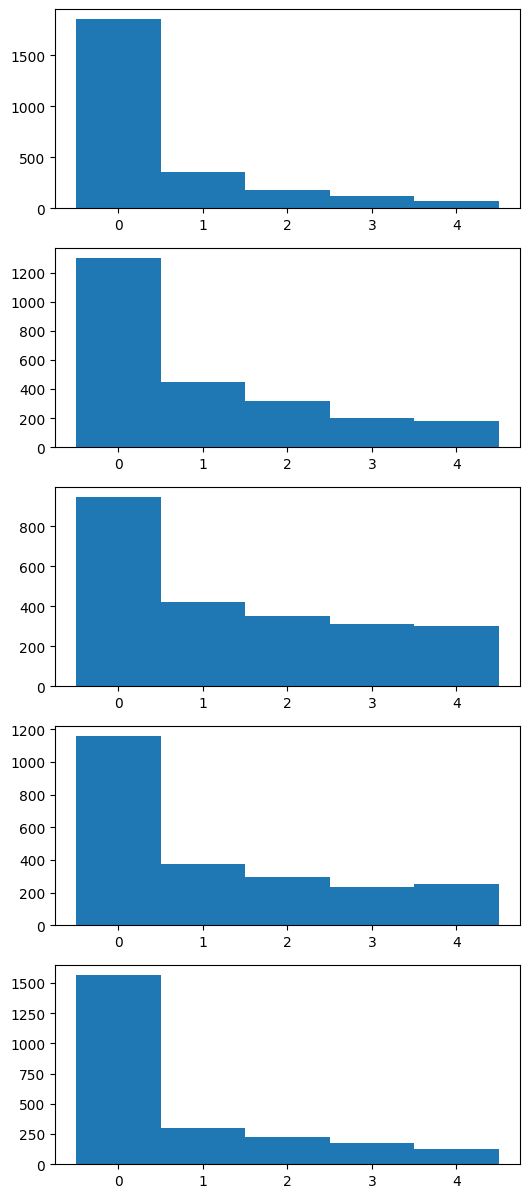

In [79]:
fig, ax = plt.subplots(5, 1, figsize=(6, 15))

for i in range(5):
    ax[i].hist(num_correct_different_dict[4][i], alpha=1, bins = np.arange(0, 6)-0.5)

(array([129., 353., 550., 458., 222.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

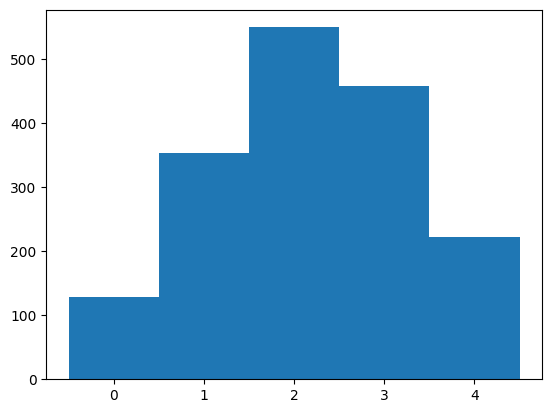

In [94]:
idxs = np.where(num_correct_different_dict[4].max(axis=0)>2)[0]

plt.hist(num_correct_different_dict[4][:, idxs].argmax(axis=0), alpha=1, bins = np.arange(0, 6)-0.5)

(array([ 47., 150., 346., 390., 308.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

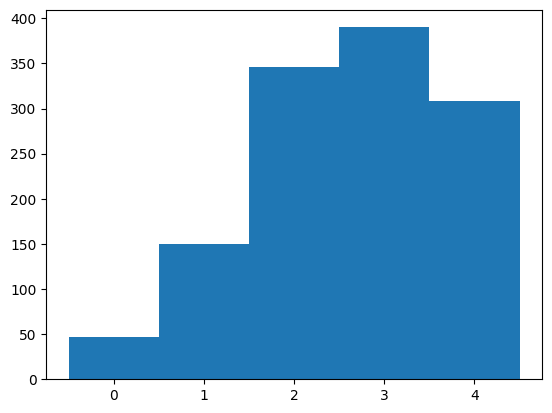

In [88]:
idxs = np.where(num_correct_different_rand.max(axis=0)>2)[0]
plt.hist(num_correct_different_rand[:, idxs].argmax(axis=0), alpha=1, bins = np.arange(0, 6)-0.5)

# compare both max and argmax for same distributions!!

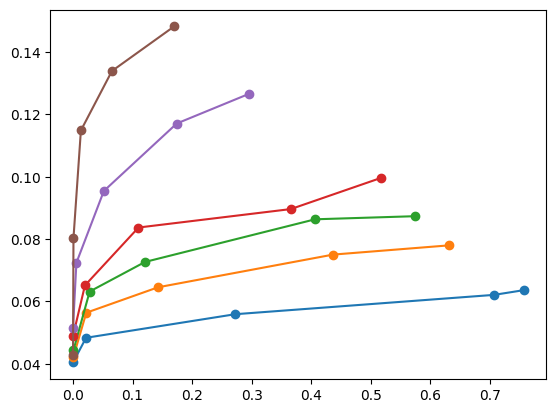

In [38]:
for num in range(5):
    plt.plot((((num_memorized_dict[num]==5) *np.expand_dims((num_correct_different_dict[num].max(axis=0)<4), 0))).mean(axis=-1), test_accs_dict[num], "o-")

plt.plot((((num_memorized_rand==5) *np.expand_dims((num_correct_different_rand.max(axis=0)<4), 0))).mean(axis=-1), test_accs_rand, "o-")

(array([228., 331., 375., 457., 482.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

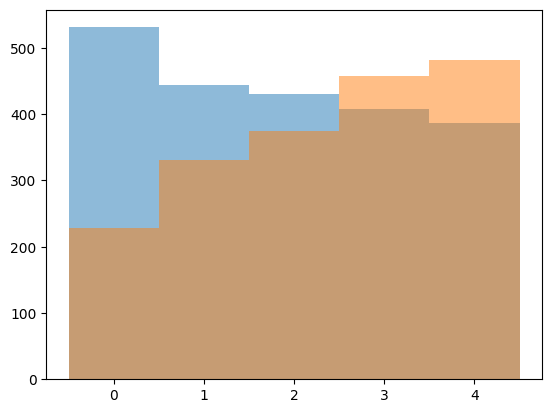

In [58]:
plt.hist(num_correct_different_rand.max(axis=0), alpha=0.5, bins = np.arange(0, 6)-0.5)
plt.hist(num_correct_different_dict[4].max(axis=0), alpha=0.5, bins = np.arange(0, 6)-0.5)


In [52]:
num_correct_different_rand[4].shape

(2646,)

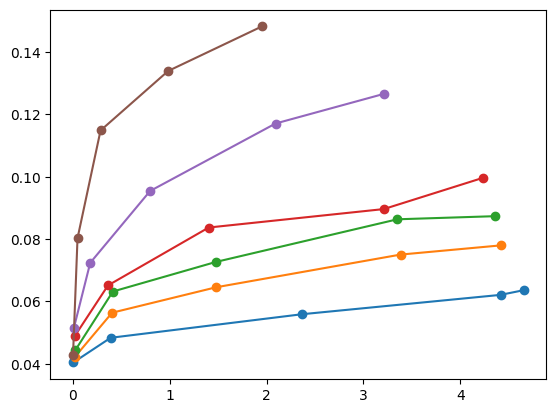

In [8]:

for num in range(5):
    plt.plot(num_memorized_dict[num].mean(axis=-1), test_accs_dict[num], "o-")

plt.plot(num_memorized_rand.mean(axis=-1), test_accs_rand, "o-")

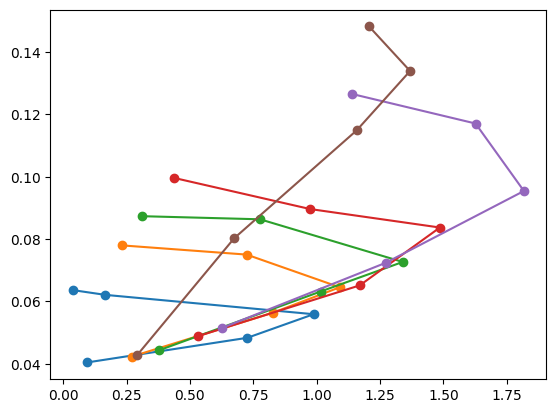

In [9]:
num_memorized_dict[0].shape

for num in range(5):
    plt.plot(num_correct_different_dict[num].mean(axis=-1), test_accs_dict[num], "o-")
    
plt.plot(num_correct_different_rand.mean(axis=-1), test_accs_rand, "o-")

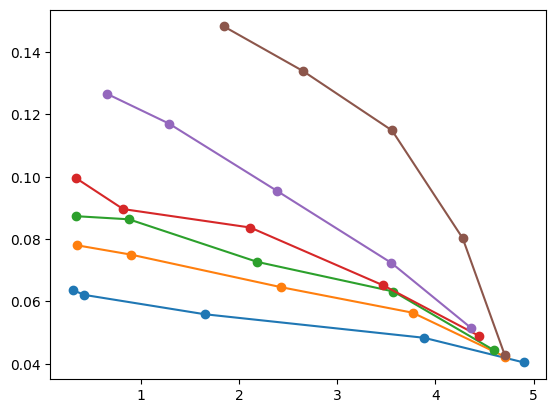

In [32]:
num_memorized_dict[0].shape

for num in range(5):
    plt.plot(num_incorrect_dict[num].mean(axis=-1), test_accs_dict[num], "o-")
    
plt.plot(num_incorrect_rand.mean(axis=-1), test_accs_rand, "o-")

In [9]:
test_accs_dict

{0: array([0.04044, 0.04836, 0.05592, 0.06212, 0.06364]),
 1: array([0.04232, 0.0564 , 0.06456, 0.07504, 0.078  ]),
 2: array([0.0444 , 0.0632 , 0.07268, 0.08636, 0.08736]),
 3: array([0.04892, 0.06516, 0.08372, 0.08964, 0.09964]),
 4: array([0.05144, 0.0724 , 0.09544, 0.11708, 0.12656])}